<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/FB_Prophet_Time_Series_Analysis/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\begin{array}{c}
\text{$\Large "Yesterday\ is\ but\ today's\ memory,\ and\ tomorrow\ is\ today's\ dream.$} \\
{\text{$\small Khalil\ Gibran$}} \\
\end{array}
$$

# Time Series Analysis with Meta Prophet

Forecasting time series data is a common task in many business domains, including finance, retail, and manufacturing. One of the tools that have emerged as particularly effective and user-friendly for this purpose is Meta Prophet. Prophet is an open-source library developed by Meta's Core Data Science team and is designed to handle the kinds of datasets commonly found in business, which often have strong seasonal patterns and are subject to missing data and outliers.

## A Quick Introduction

Prophet is unique in its approach because it's specifically tailored for business forecasts with the following characteristics:

1. **Robustness to Missing Data**: Prophet can handle time series with missing data and will fit the best model it can despite gaps in the time series.

2. **Flexibility with Irregular Observations**: Unlike traditional time series models that expect data points at regular intervals, Prophet can work with irregular time series.

3. **Accommodation of Seasonality**: The tool automatically detects and accounts for daily, weekly, and yearly seasonal patterns. Additionally, it allows for adding custom seasonality for more granular business cycles, such as fiscal quarters or specific event-driven fluctuations.

4. **Ease of Use**: Prophet is designed to have intuitive parameters that can be tuned by those who may not have advanced expertise in time series modeling. This ease of use does not come at the expense of capability, however. The underlying model is powerful, with a fitting process that utilizes Stan, a probabilistic programming language for Bayesian statistical inference.

5. **Decomposable Model**: The forecast is decomposed into three main components: trend, seasonality, and holidays. This decomposition allows for easy interpretation and the ability to inspect the influence of each component on the forecast.

The core of Prophet's methodology is an additive regression model with four main components:
- A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by choosing change points from the data.
- A yearly seasonal component modeled using Fourier series.
- A weekly seasonal component using dummy variables.
- A provision to include holiday effects that occur on irregular schedules, over one or more days.

Prophet is also robust to outliers and shifts in the trend and provides intuitive parameters to control these behaviors. This combination of flexibility, robustness, and ease of use makes Prophet an excellent choice for many practical forecasting scenarios.

## Dataset Definition

### A Sample Time Series Dataset (Store Sales - Time Series Forecasting from Kaggle)

In this task we'll be using Store Sales Dataset from Kaggle and we will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers.

### File Descriptions and Data Field Information

#### train.csv


 The training data, comprising time series of features `store_nbr`, `family`, and `onpromotion` as well as the `target sales`.

- `store_nbr`: identifies the store at which the products are sold.

- `family`: identifies the type of product sold.

- `sales`: gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

- `onpromotion`: gives the total number of items in a product family that were being promoted at a store at a given date.

#### test.csv

The test data, having the same features as the training data. You will predict the `target sales` for the `dates` in this file.

- The`dates` in the test data are for the 15 days after the last date in the training data.

### Prophet

- [Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api) follows the sklearn model API.

- First up, we create an instance of the Prophet class and then call its fit and predict methods.

- The input to Prophet is always a dataframe with two columns - `ds` and `y`.

- The `ds` (datestamp) column should be of a format expected by Pandas, ideally `YYYY-MM-DD` for a date or `YYYY-MM-DD HH:MM:SS` for a timestamp.

- The `y` column must be numeric, and represents the measurement we wish to forecast.

- Prophet also imposes the strict condition that the input columns must be named as ds (the time column) and y (the metric column). So, we must rename the columns in our dataframe.

## Implementation

### Prepare Environment

In [ ]:
! pip install prophet -q

In [ ]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Data Preparation

Read train data

In [ ]:
train_df = pd.read_csv("https://raw.githubusercontent.com/arkeodev/time-series/main/FB_Prophet_Time_Series_Analysis/data/train.csv")
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0
5,1945949,2016-01-01,1,BREAD/BAKERY,0.0,0
6,1945950,2016-01-01,1,CELEBRATION,0.0,0
7,1945951,2016-01-01,1,CLEANING,0.0,0
8,1945952,2016-01-01,1,DAIRY,0.0,0
9,1945953,2016-01-01,1,DELI,0.0,0


Read test data

In [ ]:
test_df = pd.read_csv("https://raw.githubusercontent.com/arkeodev/time-series/main/FB_Prophet_Time_Series_Analysis/data/test.csv")
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
# Convert the date columns to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])

### Model Fit and Forecast

In [ ]:
# Preparing data for the Prophet model: renaming columns to 'ds' and 'y' as required by Prophet
train_df['ds'] = train_df['date']
train_df['y'] = train_df['sales']

# We need to create a separate model for each 'store_nbr' and 'family' combination
# We will train a Prophet model for each combination and store the models in a dictionary
models = {}
forecasts = {}

# Loop through each combination of store and family
for (store, family), group_df in train_df.groupby(['store_nbr', 'family']):

    # Prepare the DataFrame for Prophet
    prophet_df = group_df[['ds', 'y']].copy()

    # Initialize and fit the Prophet model
    # Set the uncertainty interval to 80% (the Prophet default is 80%)
    m = Prophet(interval_width=0.8)
    m.fit(prophet_df)

    # Store the fitted model in the models dictionary
    models[(store, family)] = m

    # Create a future dataframe for forecasting the next 30 days
    # We do not have to concern ourselves with manually creating
    # this DataFrame, as Prophet provides the make_future_dataframe
    # helper function.
    future = m.make_future_dataframe(periods=30)

    # Make the forecast
    forecast = m.predict(future)

    # Store the forecast in the forecasts dictionary
    forecasts[(store, family)] = forecast




### Visualise Data and Forecast

/Users/kenanagyel/anaconda3/envs/pytorch/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/kenanagyel/anaconda3/envs/pytorch/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


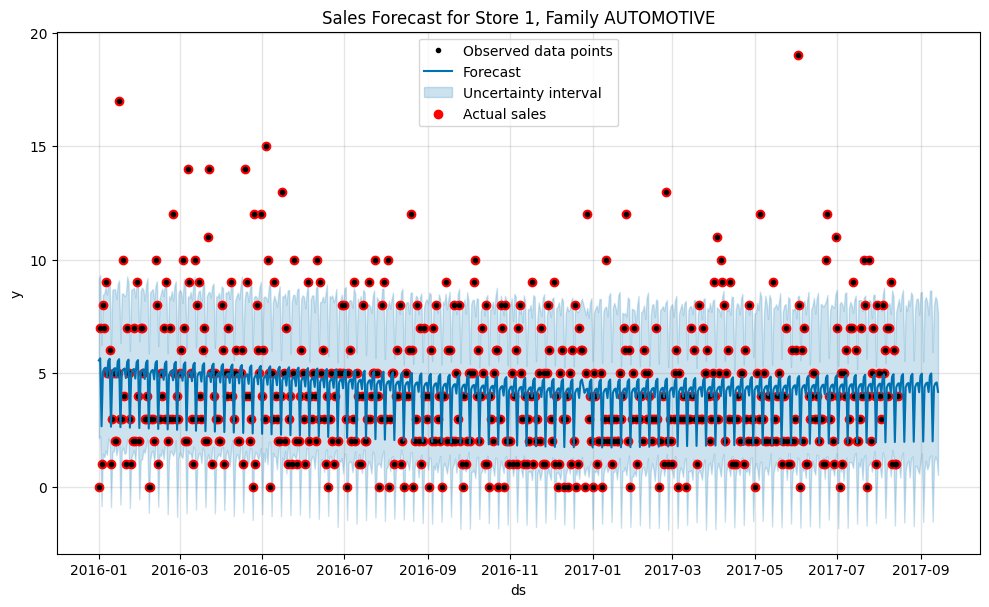

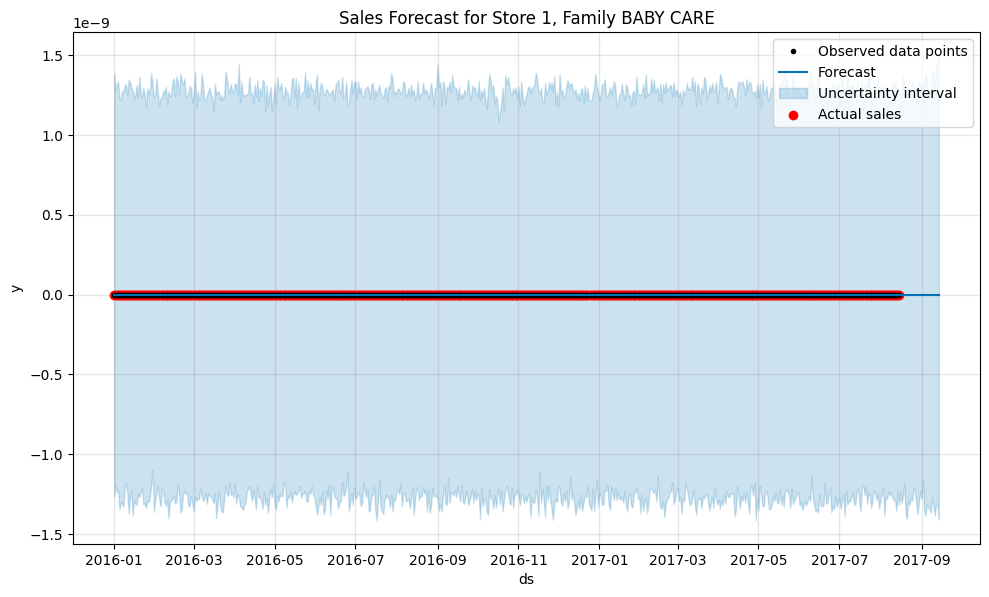

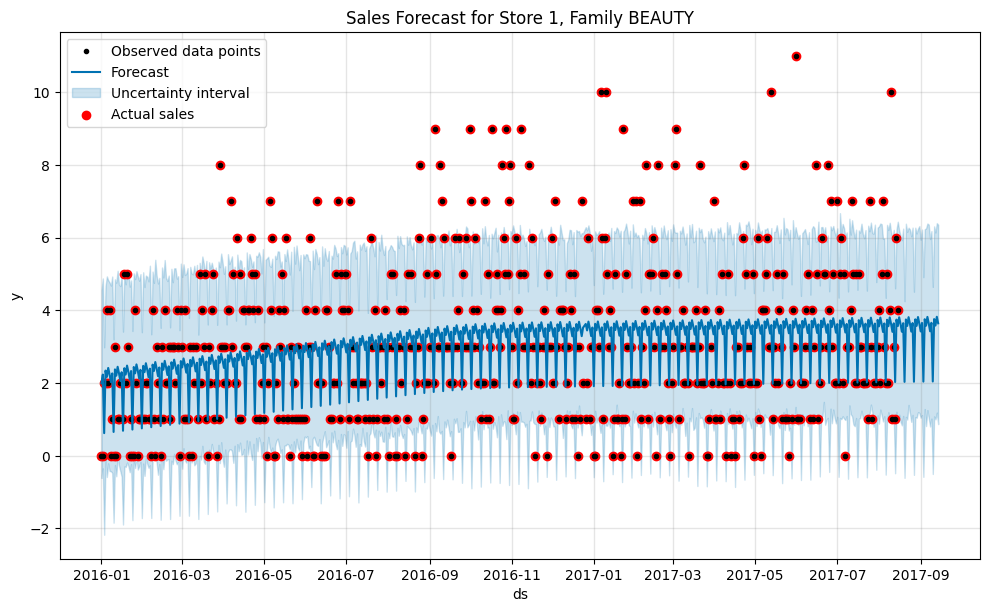

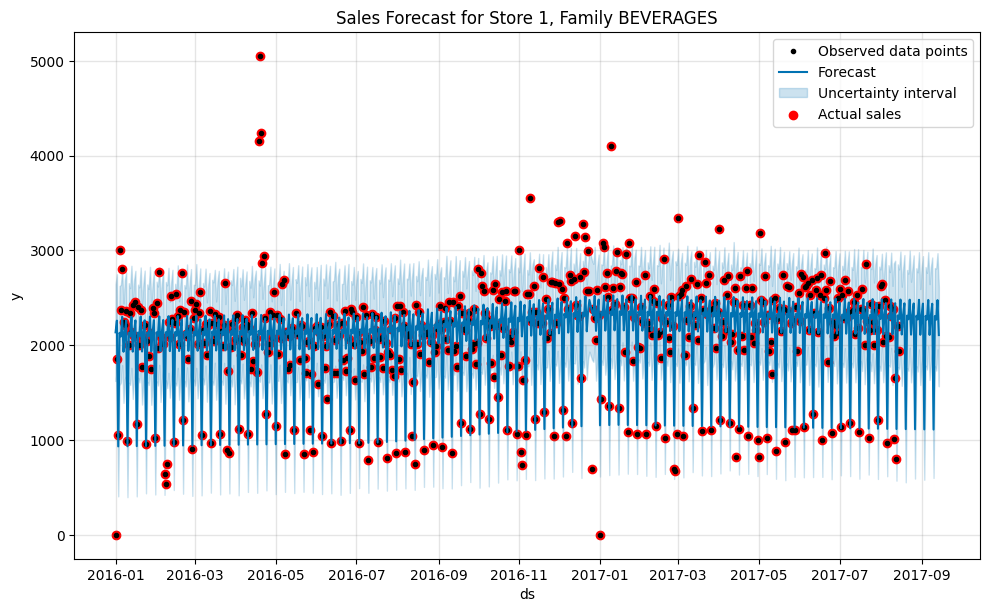

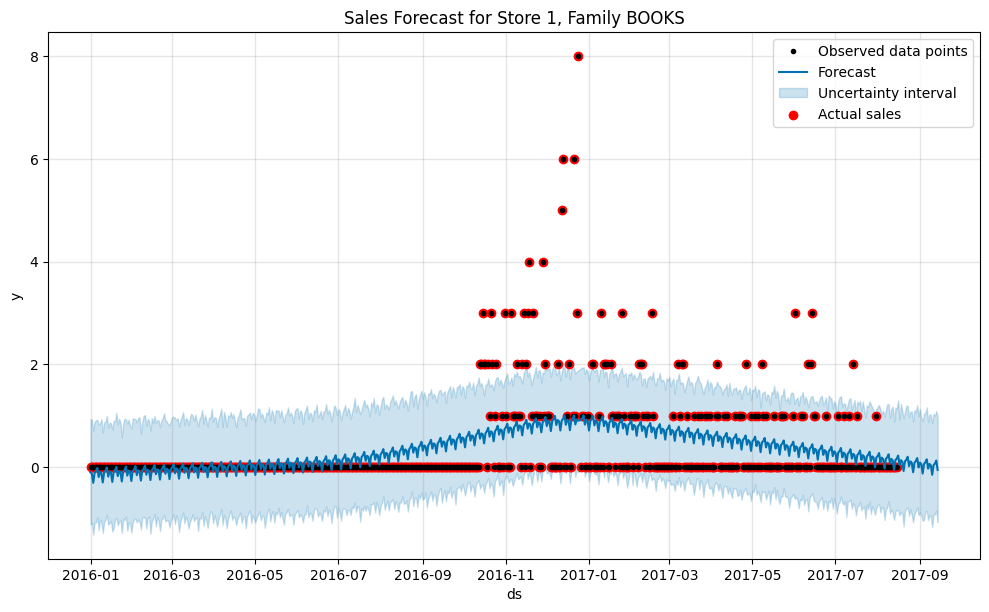

In [ ]:
import matplotlib.pyplot as plt

# Loop through each combination of store and family and plot the forecast
for (store, family), m in models.items():
    forecast = forecasts[(store, family)]
    fig = m.plot(forecast)

    # Plot the actual data points as well
    actual = train_df[(train_df['store_nbr'] == store) & (train_df['family'] == family)]
    plt.scatter(actual['ds'], actual['y'], color='red', label='Actual sales')

    # Add title and legends to the plot
    plt.title(f'Sales Forecast for Store {store}, Family {family}')
    plt.legend()

    # Show the plot
    plt.show()
    # Give the user the option to continue to the next plot or break the loop
    user_input = input("Press Enter to continue to the next plot or type 'b' to break: ")
    if user_input.lower() == 'b':
        break

### Working on Specific Forecast

Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting. These are:

- ds: the datestamp of the forecasted value
- yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
- yhat_lower: the lower bound of our forecasts
- yhat_upper: the upper bound of our forecasts

- A variation in values from the output presented is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts.
- MCMC is a stochastic process, so values will be slightly different each time.

In [ ]:
# Example of how to access a model and its forecast for store_nbr 1 and family 'BEAUTY'
specific_model = models[(1, 'BEAUTY')]
specific_forecast = forecasts[(1, 'BEAUTY')]
specific_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,1.994118,-0.611704,4.550380
1,2016-01-02,2.231636,-0.348893,4.877644
2,2016-01-03,0.621218,-2.175739,2.982284
3,2016-01-04,2.342036,-0.065370,4.663419
4,2016-01-05,2.167870,-0.585724,4.934196


- One other particularly strong feature of Prophet is its ability to return the components of our forecasts.

- This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values.

/Users/kenanagyel/anaconda3/envs/pytorch/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


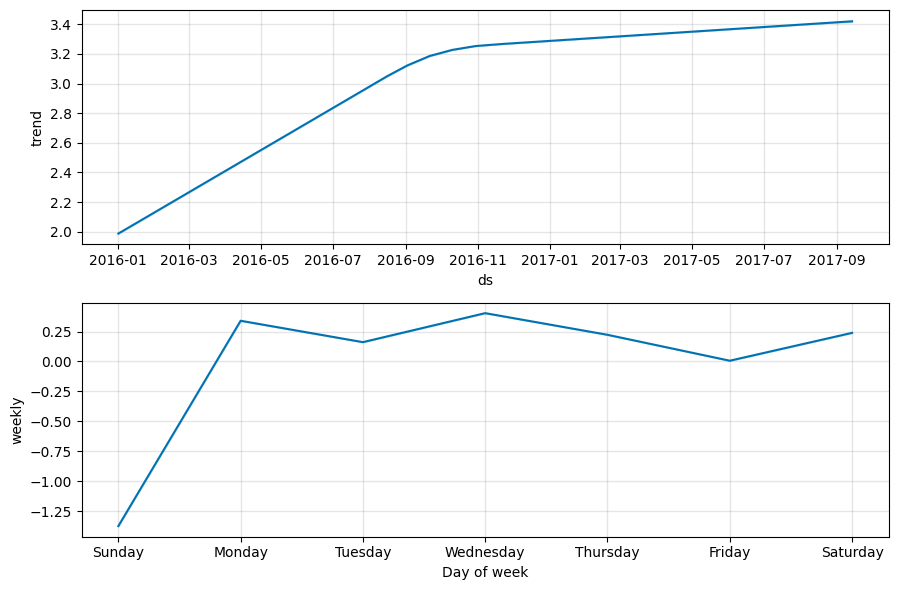

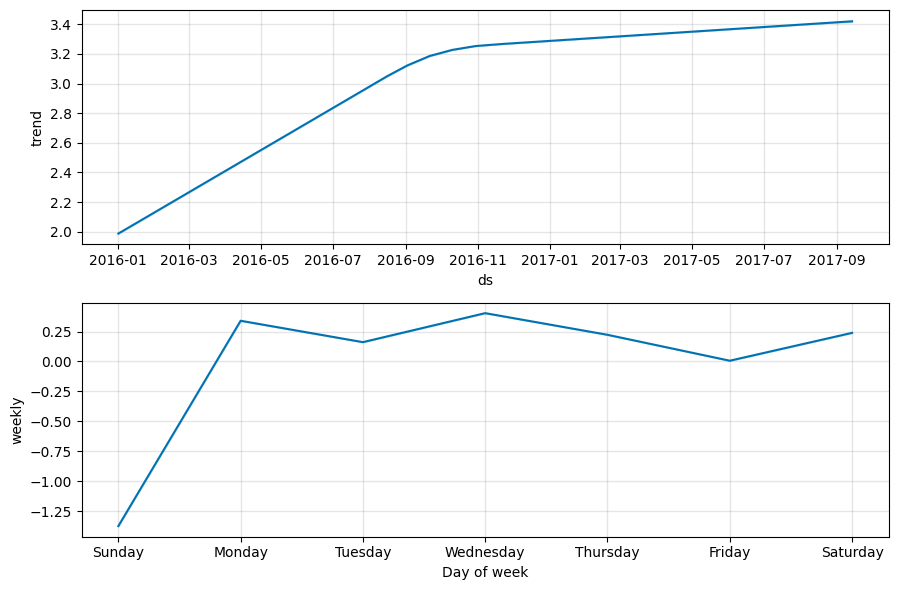

In [ ]:
specific_model.plot_components(specific_forecast)

- Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

- By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

- Let’s plot the vertical lines where the potential changepoints occurred.

/Users/kenanagyel/anaconda3/envs/pytorch/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/kenanagyel/anaconda3/envs/pytorch/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


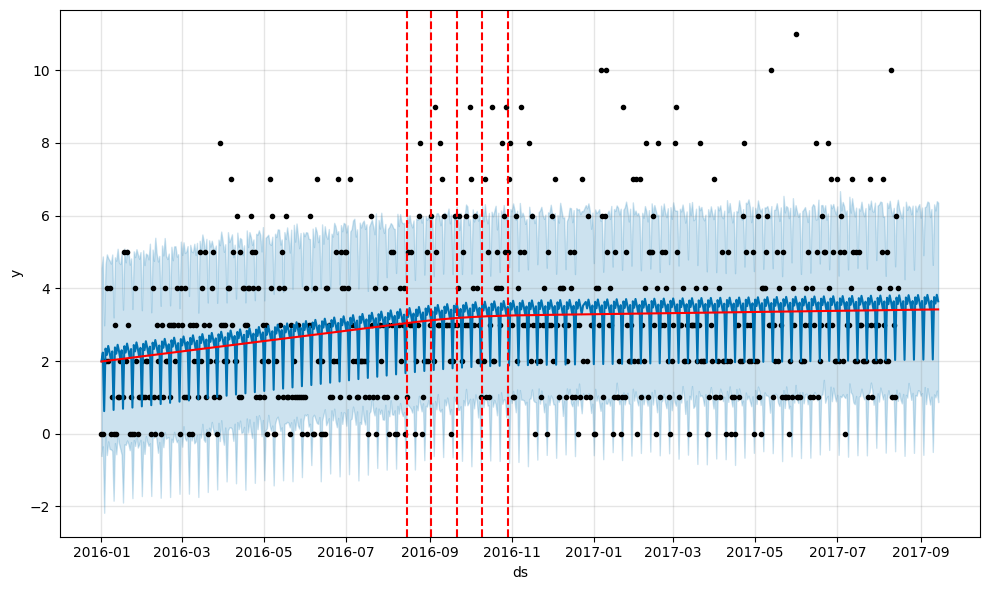

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = specific_model.plot(specific_forecast)
a = add_changepoints_to_plot(fig.gca(), specific_model, specific_forecast)

In [ ]:
specific_model.changepoints

19    2016-01-20
38    2016-02-08
57    2016-02-27
76    2016-03-17
94    2016-04-04
113   2016-04-23
132   2016-05-12
151   2016-05-31
170   2016-06-19
189   2016-07-08
208   2016-07-27
227   2016-08-15
245   2016-09-02
264   2016-09-21
283   2016-10-10
302   2016-10-29
321   2016-11-17
340   2016-12-06
359   2016-12-26
378   2017-01-14
396   2017-02-01
415   2017-02-20
434   2017-03-11
453   2017-03-30
472   2017-04-18
Name: ds, dtype: datetime64[ns]

## Conclusion

In this exploration of time series analysis with Meta Prophet, we've journeyed through the practical steps of forecasting sales data for the Favorita stores in Ecuador. We started by understanding the robust and flexible nature of Prophet, which has been thoughtfully designed to accommodate the intricacies of business-related datasets. Our process encompassed data preparation, model fitting, forecasting, and visualization, adhering to Prophet's intuitive framework.

Through each step, Prophet proved to be an invaluable asset. Its ability to manage missing data, incorporate irregular observations, and unravel the complexity of seasonality highlights why it is an excellent choice for time series forecasting. We've witnessed the simplicity with which we can create and tune models to dissect and project trends, yearly, weekly, and daily seasonality, along with the impact of holidays.

The visualization of forecasts alongside actual sales data not only provided clarity on the model's performance but also offered actionable insights. The ability to view components of our forecasts unveiled the driving factors behind sales patterns, aiding in strategic decision-making.

Our findings also underlined the stochastic nature of time series forecasting. While Prophet utilizes advanced techniques like MCMC for accuracy, the slight variations in results with each run are a testament to the dynamic nature of forecasting. This variability should be embraced as part of the process, indicative of the model's sensitivity to data patterns.

## References

1. Prophet documentation: https://facebook.github.io/prophet/docs/quick_start.html#python-api

2. Tutorial: Time Series Forecasting with Prophet: https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet